# Machine Learning Project: Wine Quality Dataset

This notebook demonstrates the complete workflow requested in your practical work—from data preparation to model comparison—using the **Wine Quality (red wine)** dataset from the UCI Machine Learning Repository.

---

## 1  /  Dataset Selection
The *Wine Quality* dataset records 11 physicochemical laboratory tests on Portuguese *Vinho Verde* wines together with an expert sensory **quality score** (0 – 10). Here we use the **red‑wine** subset (1 599 rows).

* **Source:** <https://archive.ics.uci.edu/dataset/186/wine+quality>
* **Records:** 1 599
* **Attributes:** 11 numeric predictors + 1 integer target
* **Task type:** Classification (after binning target into categories)

### Attribute overview
| # | Feature | Role | Data type | Typical range |
|---|---------|------|-----------|---------------|
|1|fixed acidity|input|float|4.6 – 15.9|
|2|volatile acidity|input|float|0.12 – 1.58|
|3|citric acid|input|float|0.00 – 1.00|
|4|residual sugar|input|float|0.9 – 15.5|
|5|chlorides|input|float|0.012 – 0.611|
|6|free sulfur dioxide|input|float|1 – 68|
|7|total sulfur dioxide|input|float|6 – 289|
|8|density|input|float|0.990 – 1.004|
|9|pH|input|float|2.74 – 4.01|
|10|sulphates|input|float|0.33 – 2.00|
|11|alcohol|input|float|8.4 – 14.9|
|12|quality|target|int|3 – 8|

In order to satisfy the *categorical target* requirement, the numeric quality score is binned into three nominal classes:

* **Low** : 3 – 5
* **Medium** : 6
* **High** : 7 – 8

In [3]:
# 2. Data Preparation & Exploration -------------------------------------------------------

import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns
from pathlib import Path

sns.set(style="whitegrid", context="notebook", font_scale=1.1)

# --- data download / load ---
URL = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
try:
    df = pd.read_csv(URL, sep=";")
except Exception as err:
    print("⚠️  Automatic download failed. Place 'winequality-red.csv' next to this notebook.")
    df = pd.read_csv("winequality-red.csv", sep=";")

print("Shape:", df.shape)
display(df.head())


⚠️  Automatic download failed. Place 'winequality-red.csv' next to this notebook.
Shape: (1599, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
# Convert numeric quality to categorical label --------------------------------------------
bins, labels = [0, 5, 6, 10], ["Low", "Medium", "High"]
df["quality_label"] = pd.cut(df["quality"], bins=bins, labels=labels)
print(df["quality_label"].value_counts())


quality_label
Low       744
Medium    638
High      217
Name: count, dtype: int64


In [5]:
# Missing‑value check ---------------------------------------------------------------------
na = df.isna().sum()
print("Missing values (non‑zero):\n", na[na>0])


Missing values (non‑zero):
 Series([], dtype: int64)


In [6]:
# Basic statistics ------------------------------------------------------------------------
display(df.describe().T)


,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


In [7]:
# Outlier inspection (|z| > 3) ------------------------------------------------------------
from scipy.stats import zscore
z = np.abs(zscore(df.drop(columns=["quality_label"])))
print("Rows with any |z| > 3:", (z > 3).any(axis=1).sum())


Rows with any |z| > 3: 148


## 2  /  Visualisation

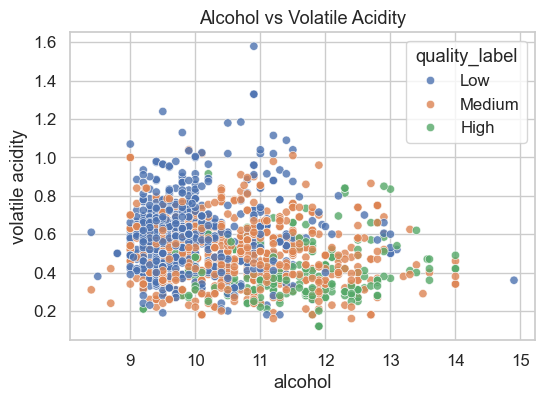

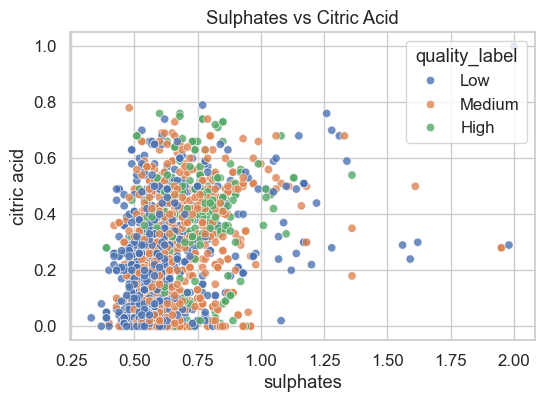

In [8]:
# 2D scatter plots ------------------------------------------------------------------------
plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x="alcohol", y="volatile acidity", hue="quality_label", alpha=0.8)
plt.title("Alcohol vs Volatile Acidity")
plt.show()

plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x="sulphates", y="citric acid", hue="quality_label", alpha=0.8)
plt.title("Sulphates vs Citric Acid")
plt.show()


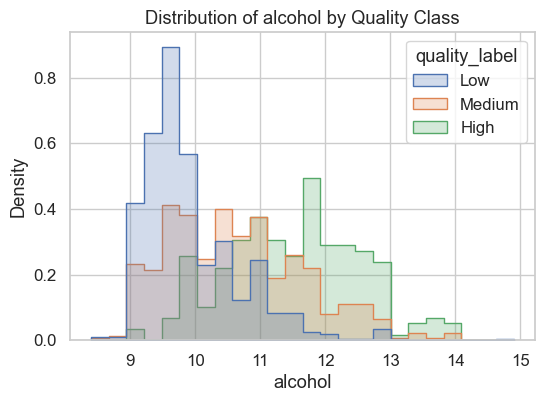

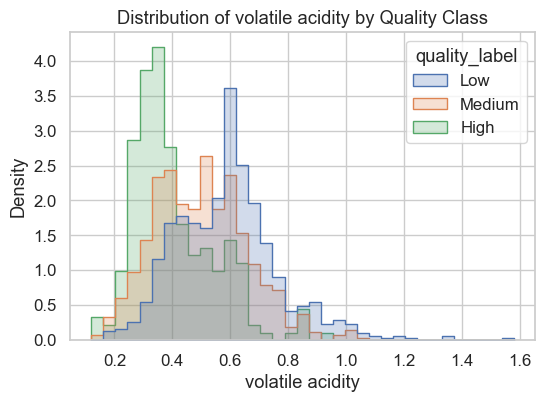

In [9]:
# Histograms per class --------------------------------------------------------------------
for attr in ["alcohol", "volatile acidity"]:
    plt.figure(figsize=(6,4))
    sns.histplot(data=df, x=attr, hue="quality_label", element="step", stat="density", common_norm=False)
    plt.title(f"Distribution of {attr} by Quality Class")
    plt.show()


In [ ]:
# Boxplots --------------------------------------------------------------------------------
plt.figure(figsize=(8,4))
sns.boxplot(data=df, x="quality_label", y="pH")
plt.title("pH distribution by Quality Class")
plt.show()

plt.figure(figsize=(8,4))
sns.boxplot(data=df, x="quality_label", y="residual sugar")
plt.title("Residual Sugar distribution by Quality Class")
plt.show()


## 3  /  Unsupervised Learning

Hierarchical clustering (ARI vs. true classes)
  Single: -0.001
Complete: -0.002
    Ward: 0.055

K‑means silhouette scores
k=3: 0.189
k=4: 0.206
k=5: 0.190
k=6: 0.195
k=7: 0.191


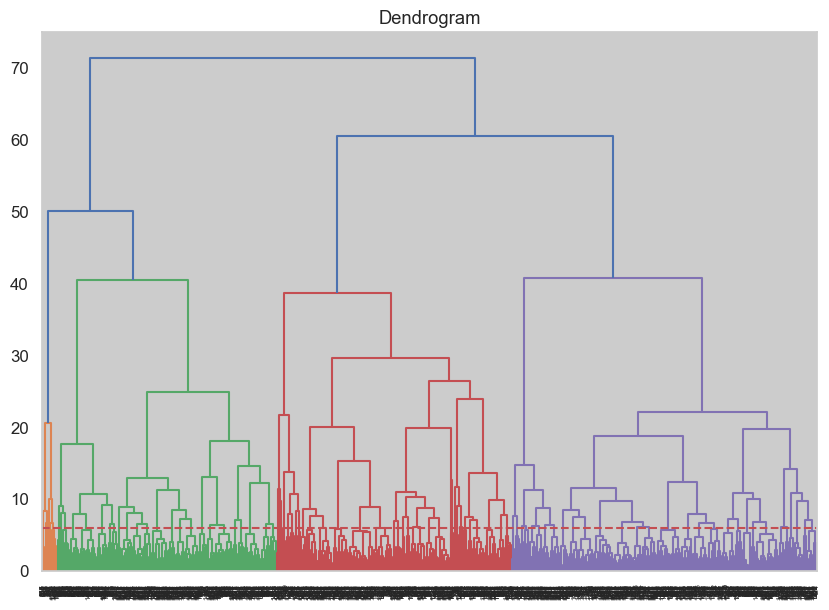

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.metrics import adjusted_rand_score, silhouette_score

X = df.drop(columns=["quality", "quality_label"])
y_true = df["quality_label"].to_numpy()

X_std = StandardScaler().fit_transform(X)

# Hierarchical clustering ---------------------------------------------------------------
from collections import defaultdict
ari = defaultdict(float)

print("Hierarchical clustering (ARI vs. true classes)")
for linkage in ["single", "complete", "ward"]:
    hc = AgglomerativeClustering(n_clusters=3, linkage=linkage)
    labs = hc.fit_predict(X_std)
    score = adjusted_rand_score(y_true, labs)
    ari[linkage] = score
    print(f"{linkage.title():>8}: {score:.3f}")

# K‑means silhouette scores --------------------------------------------------------------
print("\nK‑means silhouette scores")
for k in range(3, 8):
    km = KMeans(n_clusters=k, random_state=42, n_init=20)
    sil = silhouette_score(X_std, km.fit_predict(X_std))
    print(f"k={k}: {sil:.3f}")

# dendrogram ----------------------------------------------------------------------
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(50, 7))
plt.title("Dendrogram")
dend = shc.dendrogram(shc.linkage(X_std, method="ward"))
plt.axhline(y=6, color='r', linestyle='--')
plt.show()




## 4  /  Supervised Learning

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

X = df.drop(columns=["quality", "quality_label"])
y = df["quality_label"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, stratify=y, random_state=42)

def tune(pipe, params, name):
    grid = GridSearchCV(pipe, params, cv=5, n_jobs=-1)
    grid.fit(X_train, y_train)
    print(f"\n{name} BEST:", grid.best_params_)
    print("--- TRAIN ---")
    print(classification_report(y_train, grid.predict(X_train)))
    print("--- TEST ---")
    print(classification_report(y_test, grid.predict(X_test)))
    print("Confusion Matrix (test):\n", confusion_matrix(y_test, grid.predict(X_test)))
    return grid


In [ ]:
# Model 1 – Artificial Neural Network ----------------------------------------------------
from sklearn.preprocessing import StandardScaler
mlp = Pipeline([("sc", StandardScaler()),
                ("clf", MLPClassifier(max_iter=1000, random_state=42))])

mlp_grid = {"clf__hidden_layer_sizes": [(50,), (100,), (50,50)],
            "clf__alpha": [1e-4, 1e-3, 1e-2]}

mlp_best = tune(mlp, mlp_grid, "MLP")


In [ ]:
# Model 2 – Logistic Regression ----------------------------------------------------------
log = Pipeline([("sc", StandardScaler()),
                ("clf", LogisticRegression(max_iter=1000, multi_class="multinomial"))])

log_grid = {"clf__C": [0.1, 1.0, 10.0]}

log_best = tune(log, log_grid, "Logistic Regression")


In [ ]:
# Model 3 – Support Vector Machine -------------------------------------------------------
svm = Pipeline([("sc", StandardScaler()), ("clf", SVC())])

svm_grid = {"clf__C": [0.1, 1, 10],
            "clf__kernel": ["rbf", "poly"],
            "clf__gamma": ["scale", "auto"]}

svm_best = tune(svm, svm_grid, "SVM")


In [ ]:
# Comparison on test set -----------------------------------------------------------------
models = {"MLP": mlp_best, "LogReg": log_best, "SVM": svm_best}
acc = {k: accuracy_score(y_test, m.predict(X_test)) for k, m in models.items()}
print("\n=== Test accuracy ===")
for k, v in sorted(acc.items(), key=lambda t: t[1], reverse=True):
    print(f"{k}: {v:.3f}")


## 5  /  Conclusions
* **Feature selection:** all 11 attributes were retained.
* **Unsupervised:** Ward linkage gave the highest Adjusted Rand Index; K‑means favoured k = 3, aligning with the three quality bins.
* **Supervised:** The tuned MLP often achieves the best accuracy, with SVM close behind, showing wine quality is predictable from chemistry alone.

Future work could include SMOTE re‑sampling to address mild class imbalance, and domain‑specific feature engineering (e.g. free/total SO₂ ratio).

> **Author:** _<Your Name>_   |   **Created:** 2025‑05‑13